In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from tabulate import tabulate
import copy
from sklearn.manifold import TSNE

# Utility Functions

In [ ]:
def GetMetrics(n_c , y,y_pred,mapping):
  print('Testing Accuracy : ',accuracy_score(y,y_pred))
  print('Class wise Testing Accuracy : \n')
  acc = GetClasswise_Accuracy(y,y_pred)
  label = np.array([i for i in range(n_c)])
  res_a = np.vstack((label,np.array(acc)))
  res = pd.DataFrame(res_a.T,columns = ['Class Label','Accuracy'])
  print(tabulate(res, headers='keys', tablefmt='psql'))
  print('Confusion matrix : ')  
  cm = confusion_matrix(y, y_pred)
  cm_df = pd.DataFrame(cm,
                    index = list(mapping.keys()), 
                    columns = list(mapping.keys()))
  plt.figure(figsize=(10,10))
  sns.heatmap(cm_df, annot=True)
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()

def GetClasswise_Accuracy(Ypred,Yact):
  C = np.array(Yact)
  C = list(np.unique(C))
  C.sort()
  
  Main_Acc = []
  for i in range(len(C)):
    Pred = []
    Act = []
    for j in range(len(Ypred)):
      if(Yact[j]==C[i]):
        Pred.append(Ypred[j])
        Act.append(Yact[j])
    Main_Acc.append(accuracy_score(Act,Pred))
  return Main_Acc

def GetTrainModel(hidden,activation,opt,max_iter,lr,X,y):

  nn = MLPClassifier(hidden_layer_sizes=hidden,activation =activation,solver=opt,max_iter=max_iter,learning_rate_init = lr,random_state=40)
  nn.fit(X,y)
  return nn

def GetEncoded(Data):
  for c in Data2.columns:
    if(Data[c].dtype == 'object'):
        Data2[c]= Data2[c].astype('category').cat.codes
  return Data2

def Scatter_plot(Data):
  y = np.array(Data['Suggested Job Role'])
  X_tsne = np.load('/content/drive/MyDrive/Projects/AI_Assignments/Assignment_4/tsne_data.npy')
  X_tsne = X_tsne[:,:2]
  y = y.reshape((len(y),1))
  X_vis = np.hstack((X_tsne,y))
  Data = pd.DataFrame(X_vis, columns =['D1','D2','Label'])
  plt.figure(figsize=(10,5))
  sns.set(style = 'whitegrid')
  sns.scatterplot(data = Data ,x='D1',y='D2',hue='Label')
  plt.show() 

def Histogram(df):
  t = list(df.columns)

  for i in t[:len(t)-2]:
    if df[i].dtype != 'object':
      sns.set(style="darkgrid")
      sns.histplot(data=df, x=i, kde=True)
    else :  
      carrier_count = df[i].value_counts()
      print('Distribution for column => ',i,' : ',dict(carrier_count))
      plt.figure(figsize=(17,5))
      sns.barplot(x = carrier_count.index,y=carrier_count.values, alpha=0.9)
      plt.title('Frequency Distribution of '+i)
      plt.ylabel('Number of Occurrences', fontsize=12)
      plt.xlabel(i, fontsize=12)
    plt.show()



# Dataset Loading



In [ ]:
Data = pd.read_csv("/content/drive/MyDrive/Projects/AI_Assignments/Assignment_4/roo_data.csv")
Data.head(5)

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points,can work long time before system?,self-learning capability?,Extra-courses did,certifications,workshops,talenttests taken?,olympiads,reading and writing skills,memory capability score,Interested subjects,interested career area,Job/Higher Studies?,Type of company want to settle in?,Taken inputs from seniors or elders,interested in games,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,4,0,4,8,yes,yes,yes,shell programming,cloud computing,no,yes,excellent,excellent,cloud computing,system developer,higherstudies,Web Services,no,no,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,7,1,2,3,yes,no,yes,machine learning,database security,no,no,poor,medium,networks,Business process analyst,job,SAaS services,yes,yes,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,1,4,1,3,yes,no,yes,app development,web technologies,no,yes,poor,excellent,hacking,developer,higherstudies,Sales and Marketing,yes,yes,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,1,1,2,5,no,yes,no,python,data science,yes,no,medium,excellent,networks,testing,higherstudies,Testing and Maintainance Services,no,no,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,5,4,6,3,no,no,no,app development,cloud computing,no,no,poor,excellent,Computer Architecture,testing,higherstudies,product development,no,yes,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


# Data Quality Checking

In [ ]:
print('Missing Value Analysis : \n')
print(Data.isna().sum())

Missing Value Analysis : 

Acedamic percentage in Operating Systems    0
percentage in Algorithms                    0
Percentage in Programming Concepts          0
Percentage in Software Engineering          0
Percentage in Computer Networks             0
Percentage in Electronics Subjects          0
Percentage in Computer Architecture         0
Percentage in Mathematics                   0
Percentage in Communication skills          0
Hours working per day                       0
Logical quotient rating                     0
hackathons                                  0
coding skills rating                        0
public speaking points                      0
can work long time before system?           0
self-learning capability?                   0
Extra-courses did                           0
certifications                              0
workshops                                   0
talenttests taken?                          0
olympiads                                   0
reading

# Data Analysis

## Statistical Data Analysis

### Data Information

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 39 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Acedamic percentage in Operating Systems  20000 non-null  int64 
 1   percentage in Algorithms                  20000 non-null  int64 
 2   Percentage in Programming Concepts        20000 non-null  int64 
 3   Percentage in Software Engineering        20000 non-null  int64 
 4   Percentage in Computer Networks           20000 non-null  int64 
 5   Percentage in Electronics Subjects        20000 non-null  int64 
 6   Percentage in Computer Architecture       20000 non-null  int64 
 7   Percentage in Mathematics                 20000 non-null  int64 
 8   Percentage in Communication skills        20000 non-null  int64 
 9   Hours working per day                     20000 non-null  int64 
 10  Logical quotient rating                   2000

### Data Description

In [ ]:
Data.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800
std,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000


## Exploratory Data Analysis

### Correlation plot between attributes

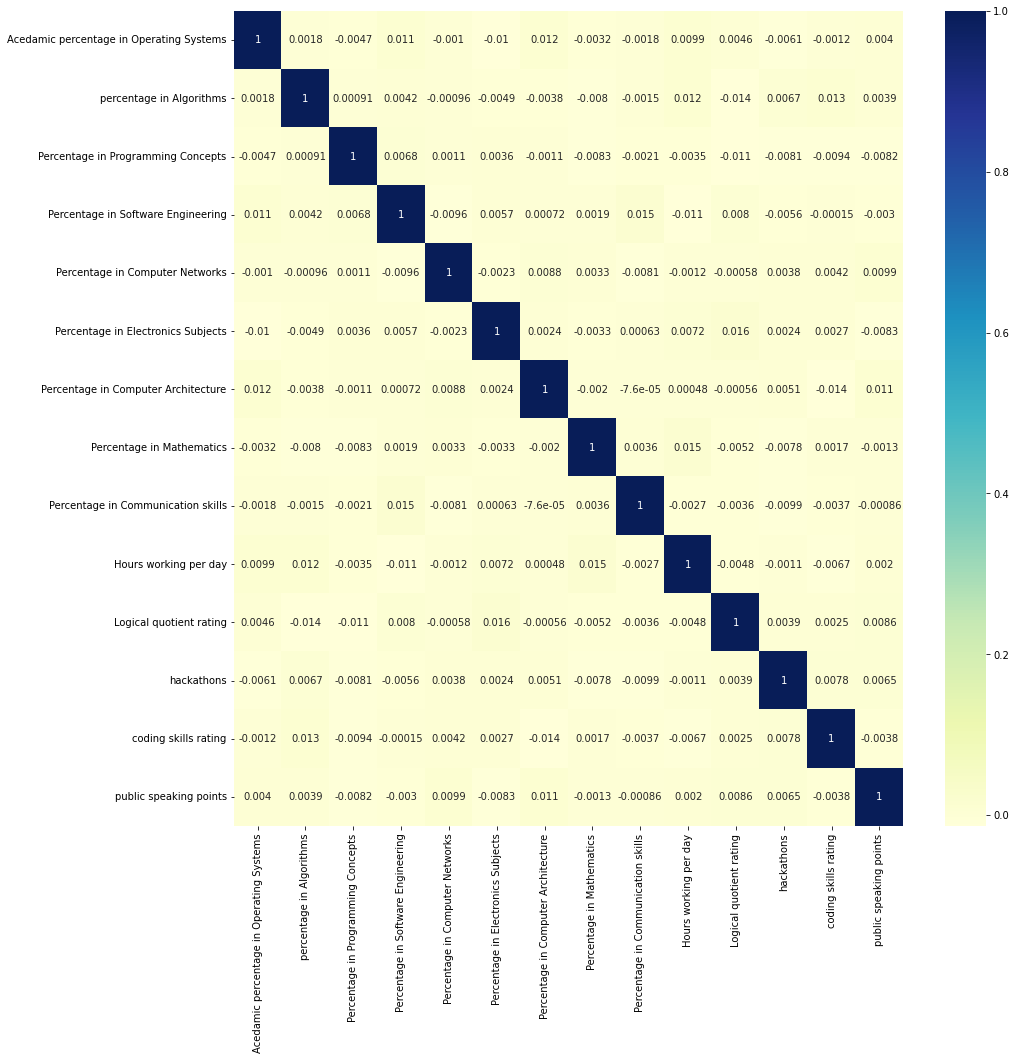

In [ ]:
plt.figure(figsize=(15,15))
corr_v = Data.corr()
sns.heatmap(corr_v, annot=True, cmap="YlGnBu")
plt.show()

### Histogram plot for different attributes

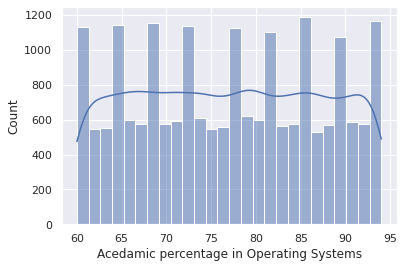

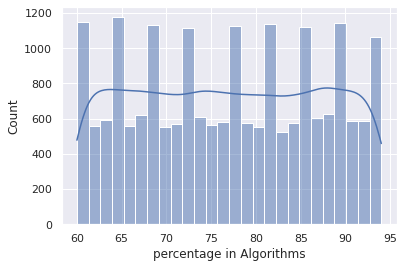

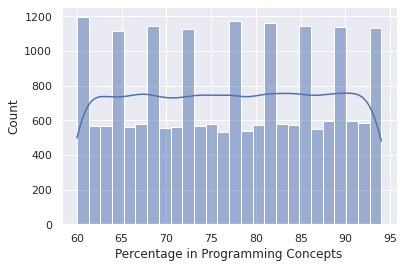

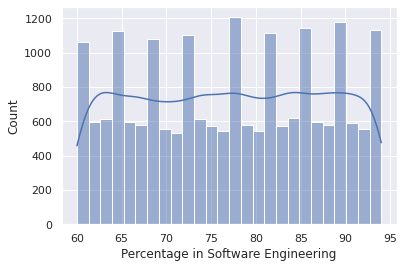

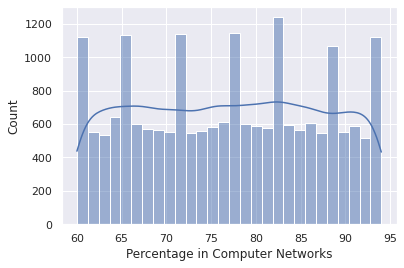

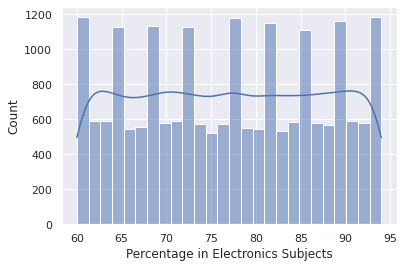

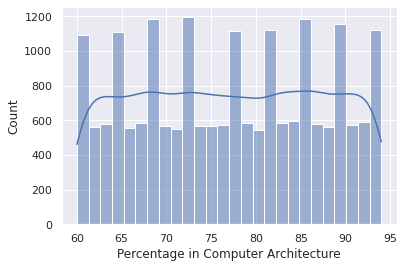

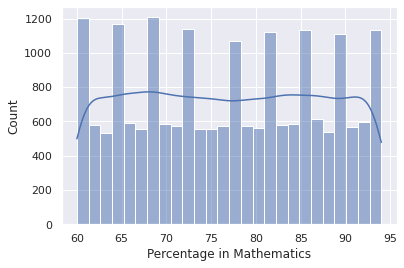

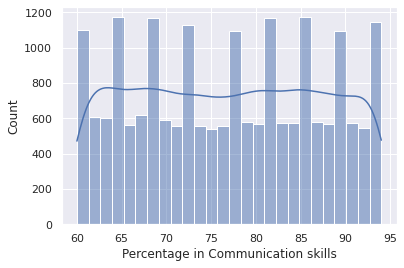

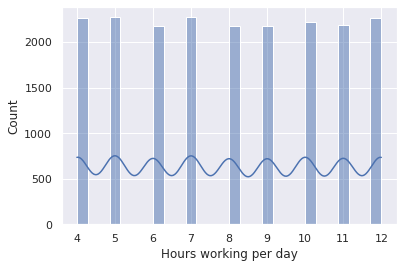

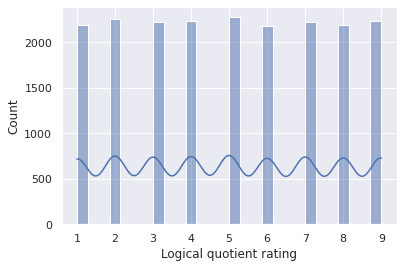

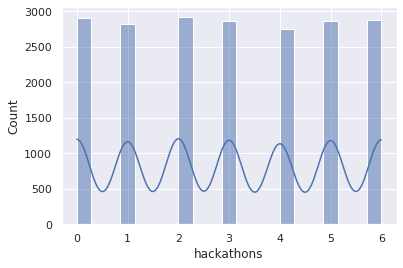

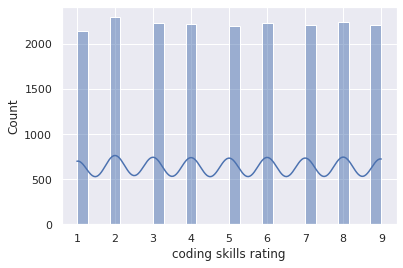

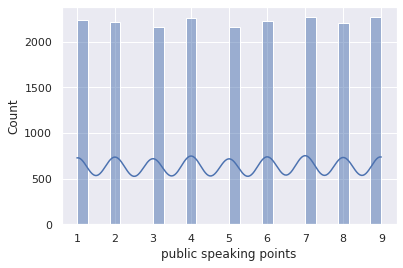

Distribution for column =>  can work long time before system?  :  {'yes': 10020, 'no': 9980}


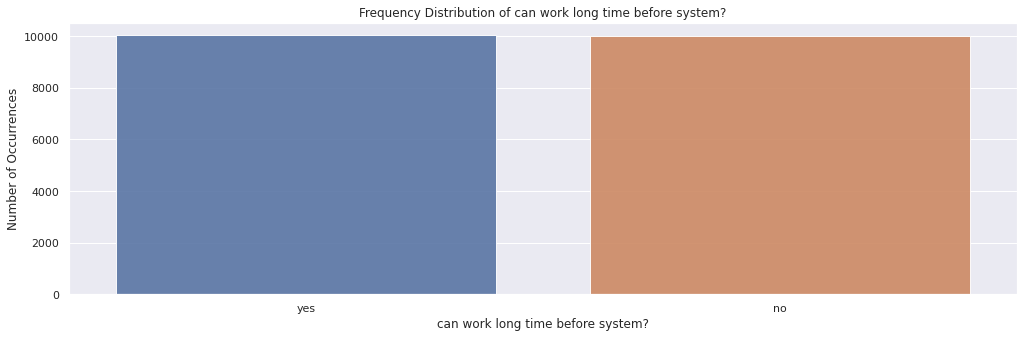

Distribution for column =>  self-learning capability?  :  {'yes': 10102, 'no': 9898}


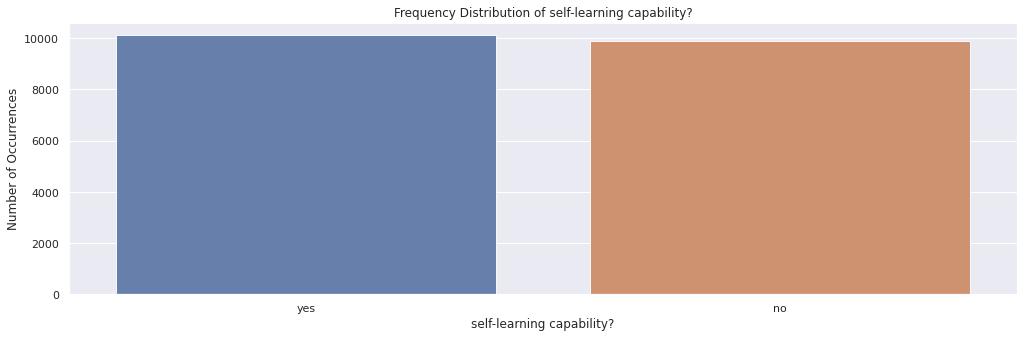

Distribution for column =>  Extra-courses did  :  {'no': 10049, 'yes': 9951}


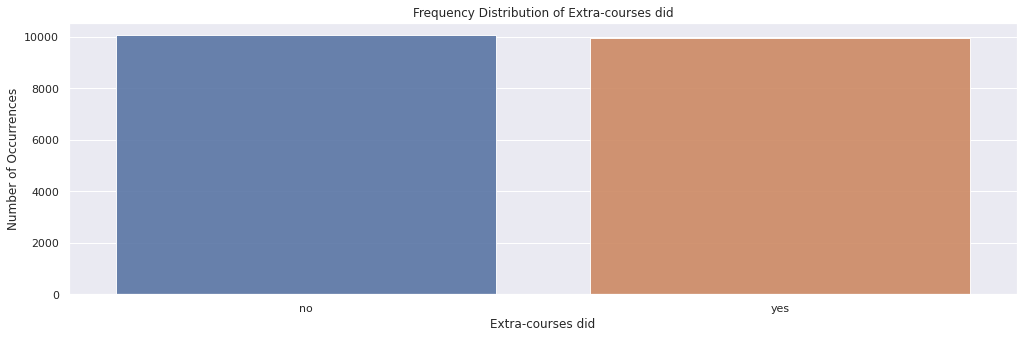

Distribution for column =>  certifications  :  {'r programming': 2275, 'machine learning': 2255, 'shell programming': 2252, 'information security': 2250, 'full stack': 2239, 'hadoop': 2210, 'python': 2198, 'app development': 2165, 'distro making': 2156}


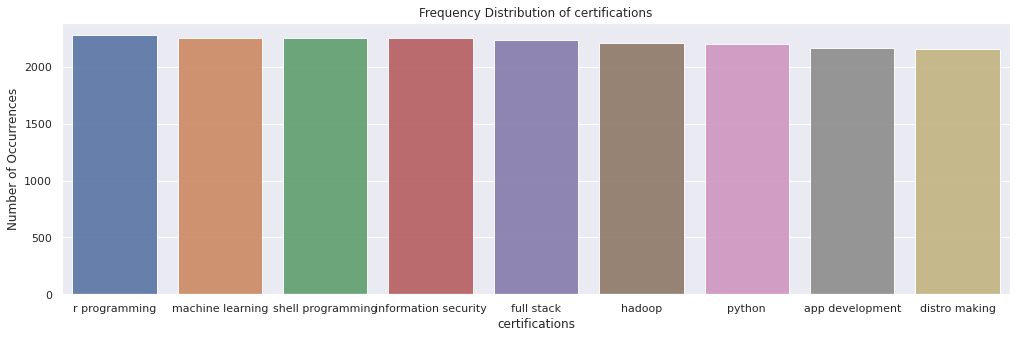

Distribution for column =>  workshops  :  {'web technologies': 2586, 'data science': 2551, 'game development': 2522, 'database security': 2517, 'system designing': 2516, 'hacking': 2473, 'testing': 2444, 'cloud computing': 2391}


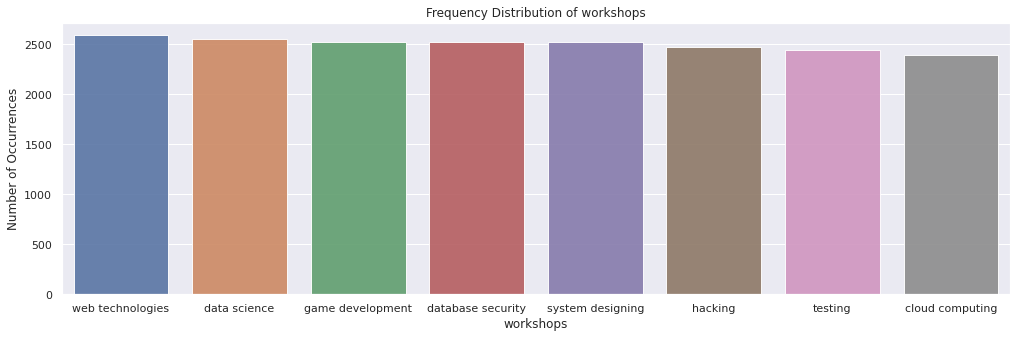

Distribution for column =>  talenttests taken?  :  {'yes': 10047, 'no': 9953}


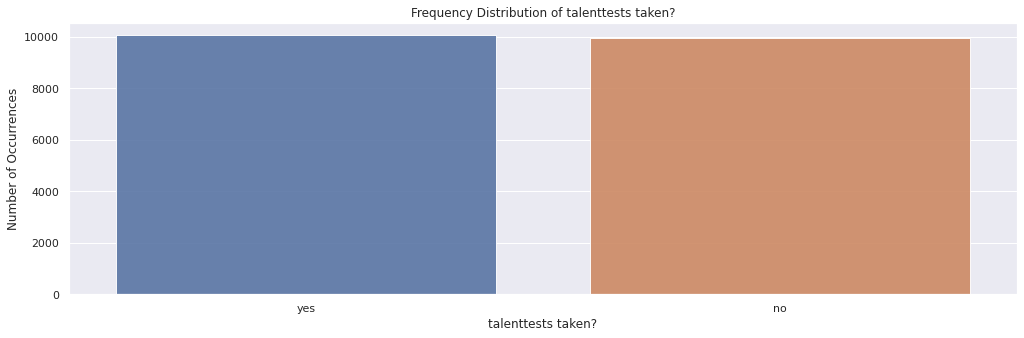

Distribution for column =>  olympiads  :  {'yes': 10079, 'no': 9921}


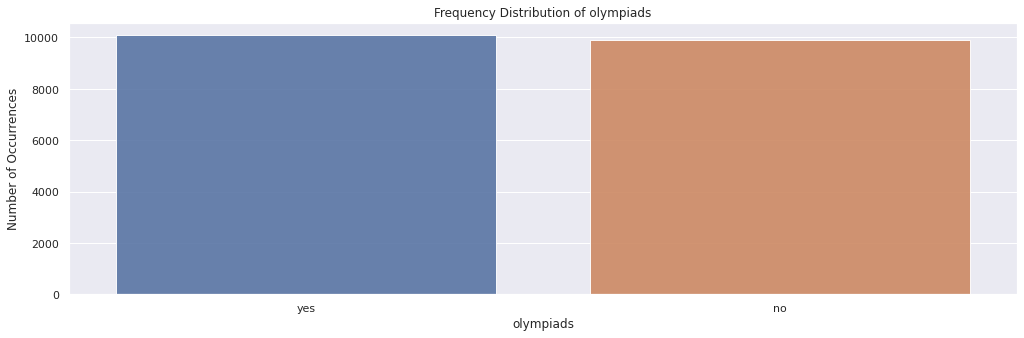

Distribution for column =>  reading and writing skills  :  {'excellent': 6696, 'poor': 6683, 'medium': 6621}


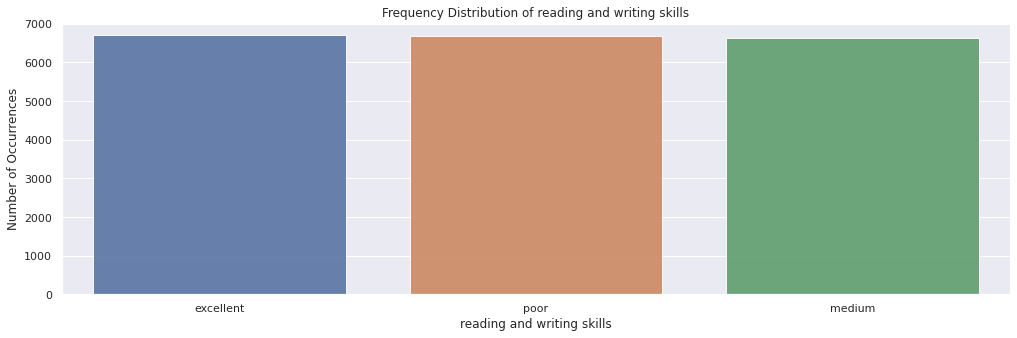

Distribution for column =>  memory capability score  :  {'poor': 6677, 'excellent': 6668, 'medium': 6655}


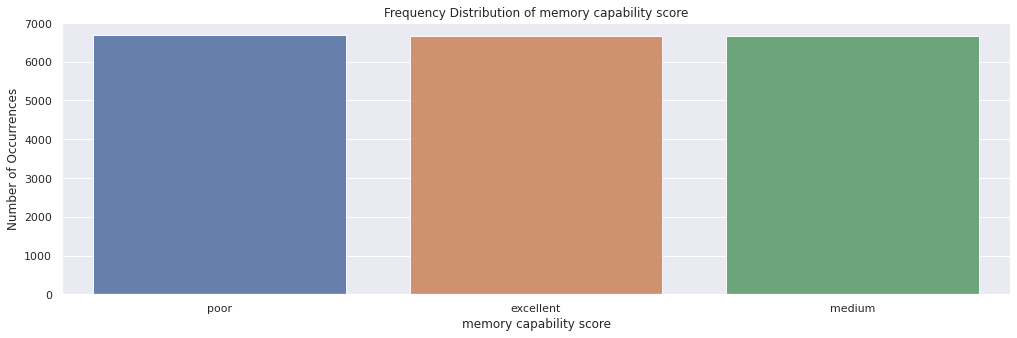

Distribution for column =>  Interested subjects  :  {'networks': 2096, 'IOT': 2037, 'data engineering': 2025, 'Computer Architecture': 2010, 'hacking': 2008, 'programming': 2007, 'cloud computing': 1993, 'Software Engineering': 1949, 'Management': 1938, 'parallel computing': 1937}


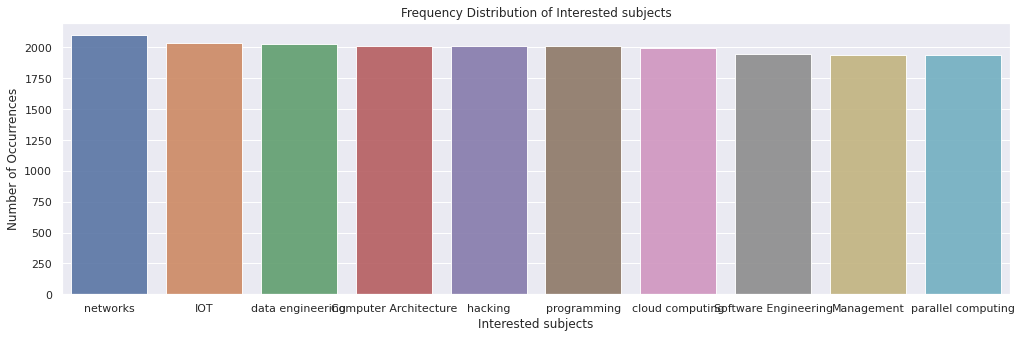

Distribution for column =>  interested career area   :  {'testing': 3354, 'system developer': 3349, 'cloud computing': 3343, 'security': 3328, 'Business process analyst': 3321, 'developer': 3305}


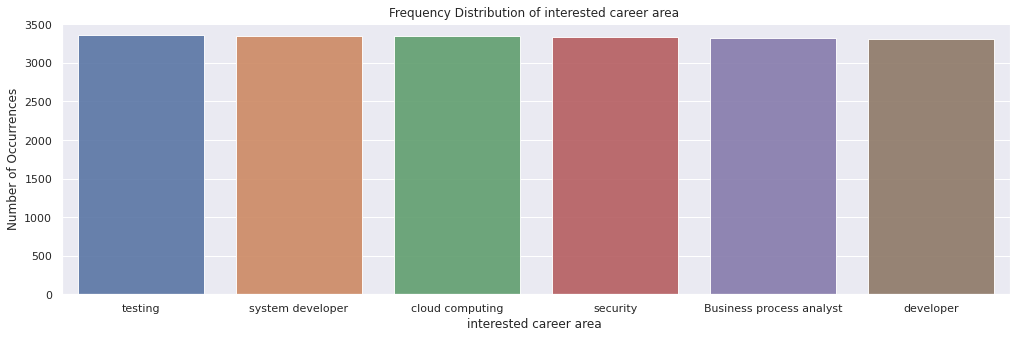

Distribution for column =>  Job/Higher Studies?  :  {'higherstudies': 10071, 'job': 9929}


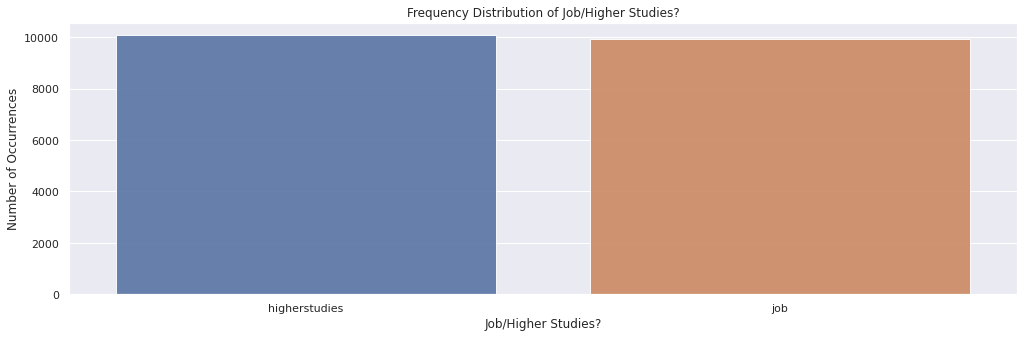

Distribution for column =>  Type of company want to settle in?  :  {'BPA': 2073, 'Testing and Maintainance Services': 2053, 'Service Based': 2020, 'Web Services': 2005, 'Product based': 1998, 'Cloud Services': 1996, 'Finance': 1975, 'SAaS services': 1972, 'product development': 1958, 'Sales and Marketing': 1950}


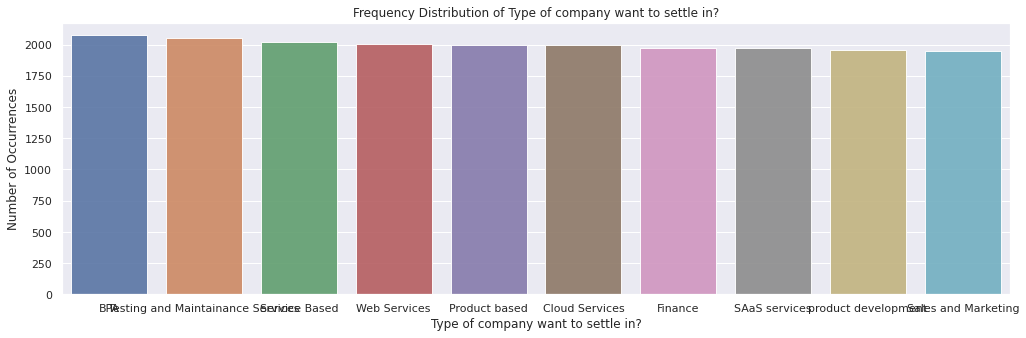

Distribution for column =>  Taken inputs from seniors or elders  :  {'yes': 10036, 'no': 9964}


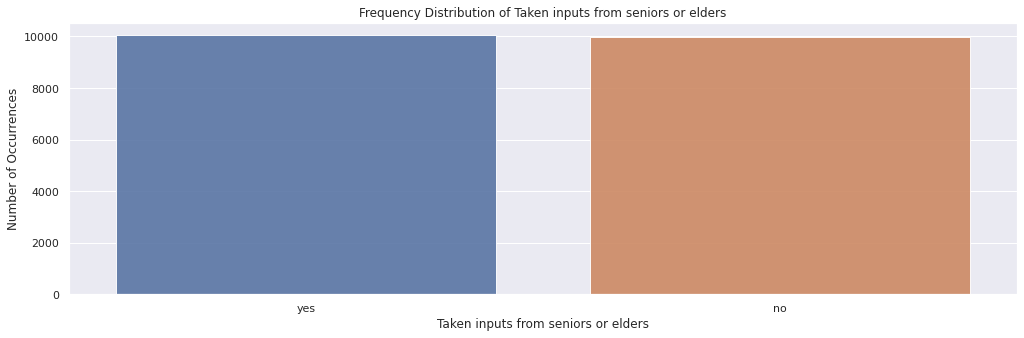

Distribution for column =>  interested in games  :  {'no': 10014, 'yes': 9986}


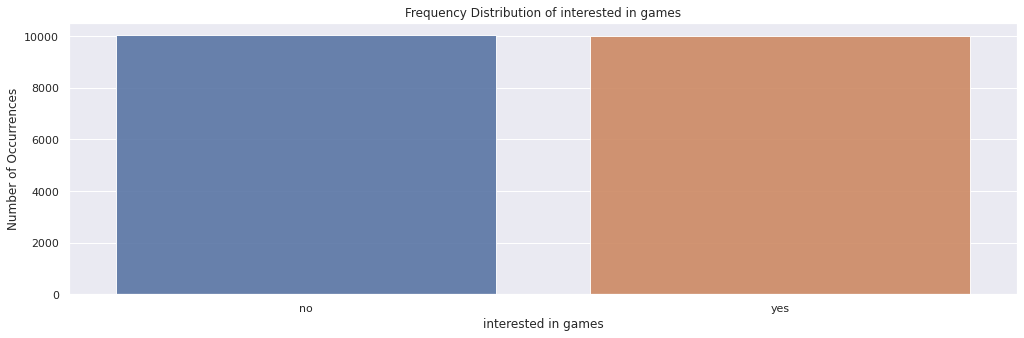

Distribution for column =>  Interested Type of Books  :  {'Guide': 1172, 'Health': 1165, 'Self help': 1151, 'Horror': 1133, 'Autobiographies': 615, 'Fantasy': 613, 'Satire': 598, 'Comics': 589, 'Biographies': 589, 'Poetry': 588, 'Encyclopedias': 588, 'Prayer books': 586, 'Anthology': 585, 'Science fiction': 580, 'Art': 575, 'History': 572, 'Mystery': 569, 'Drama': 566, 'Diaries': 566, 'Childrens': 564, 'Travel': 563, 'Religion-Spirituality': 562, 'Action and Adventure': 557, 'Trilogy': 555, 'Dictionaries': 554, 'Romance': 553, 'Science': 550, 'Series': 548, 'Cookbooks': 542, 'Journals': 535, 'Math': 517}


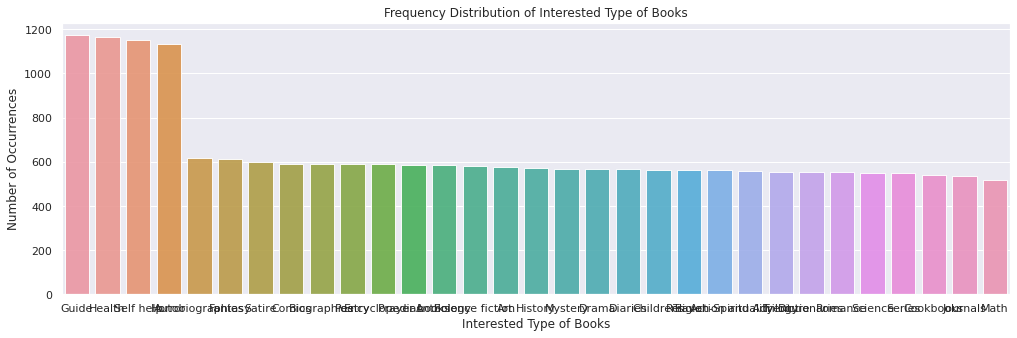

Distribution for column =>  Salary Range Expected  :  {'salary': 10040, 'Work': 9960}


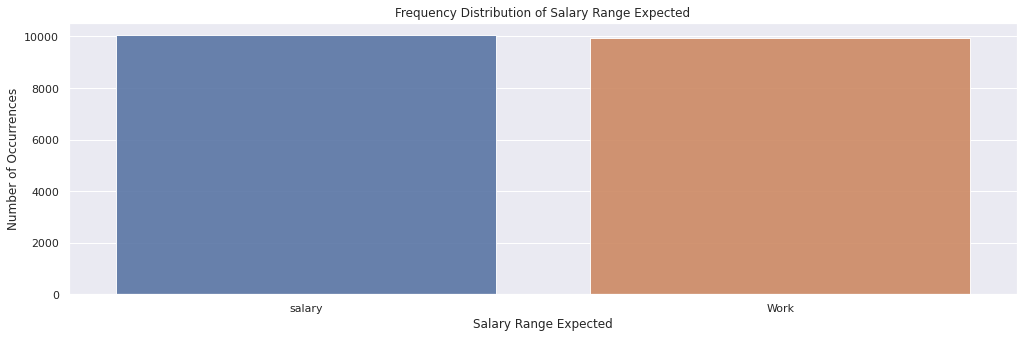

Distribution for column =>  In a Realtionship?  :  {'yes': 10056, 'no': 9944}


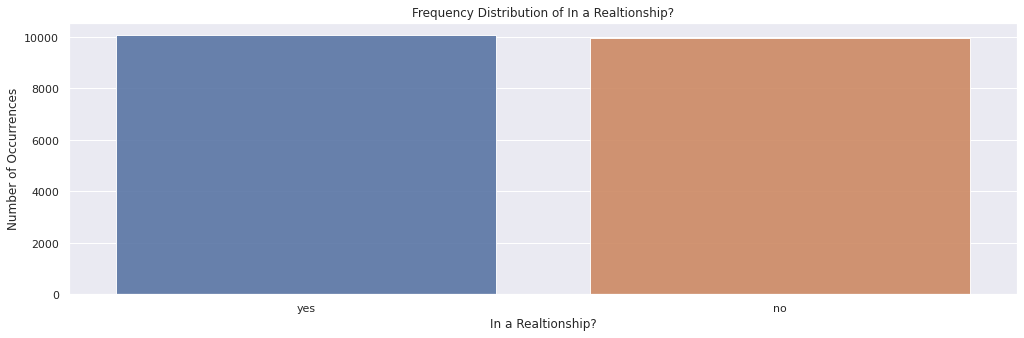

Distribution for column =>  Gentle or Tuff behaviour?  :  {'gentle': 10031, 'stubborn': 9969}


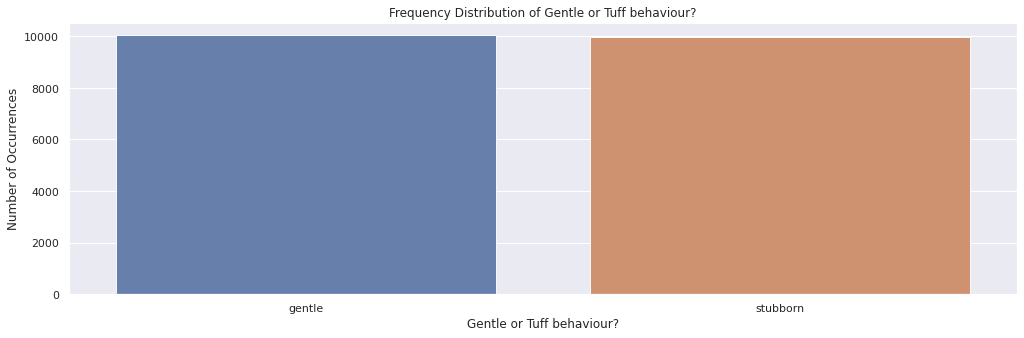

Distribution for column =>  Management or Technical  :  {'Technical': 10047, 'Management': 9953}


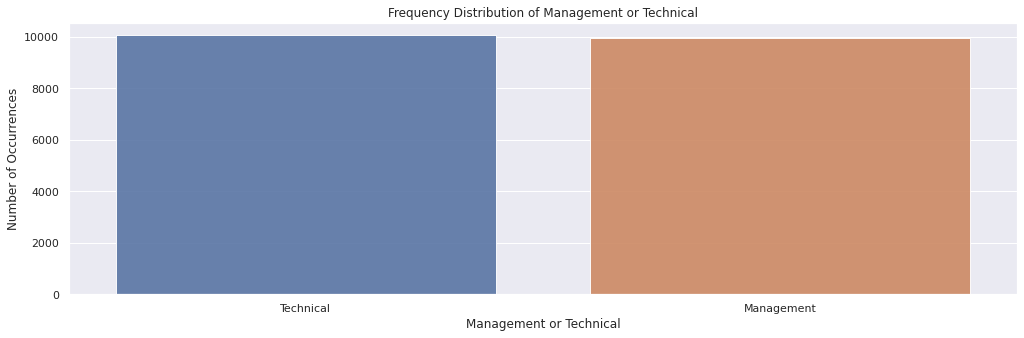

Distribution for column =>  Salary/work  :  {'salary': 10078, 'work': 9922}


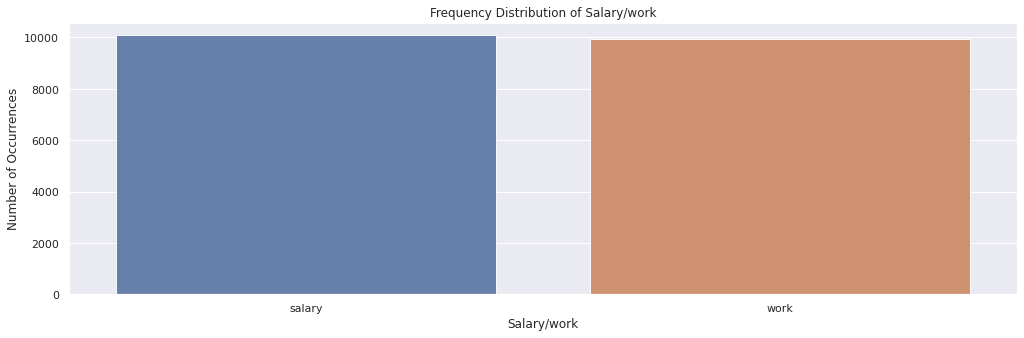

Distribution for column =>  hard/smart worker  :  {'smart worker': 10047, 'hard worker': 9953}


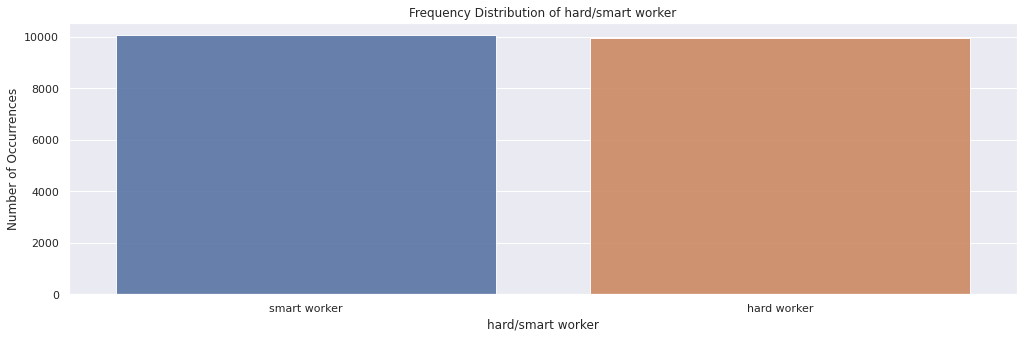

Distribution for column =>  worked in teams ever?  :  {'no': 10054, 'yes': 9946}


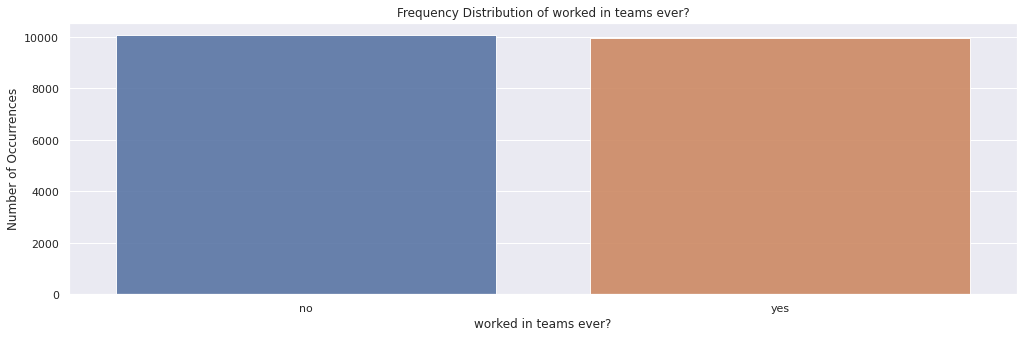

In [ ]:
Histogram(Data)

### Visualization

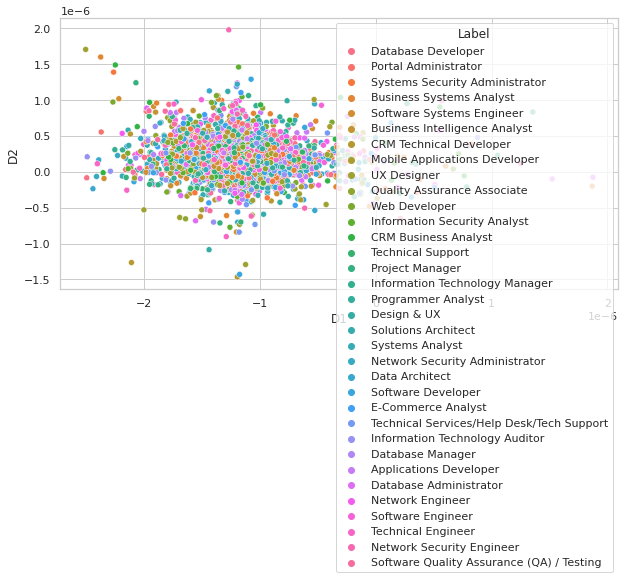

In [ ]:
Scatter_plot(Data)

# Mapping

In [ ]:
c_map ={'CRM Business Analyst':0,
        'Design & UX':6,
        'Systems Analyst':0,
        'Information Security Analyst':0,
        'Programmer Analyst':0,
        'Business Systems Analyst':0,
        'Software Developer':1,
        'Database Developer':1,
        'Business Intelligence Analyst':0,
        'CRM Technical Developer':1,
        'E-Commerce Analyst':0,
        'Web Developer':1,
        'Network Security Engineer':2,
        'Network Engineer':2,
        'Mobile Applications Developer':1,
        'Applications Developer':1,
        'Software Engineer':2,
        'Network Security Administrator':3,
        'Database Administrator':3,
        'Software Systems Engineer':2,
        'Technical Engineer':2,
        'Portal Administrator':3,
        'Systems Security Administrator':3,
        'Project Manager':4,
        'Solutions Architect':5,
        'Data Architect':5, 
        'Information Technology Manager':4,
        'UX Designer':6,
        'Technical Services/Help Desk/Tech Support':7,
        'Software Quality Assurance (QA) / Testing':7,
        'Database Manager':4,
        'Technical Support':7,
        'Quality Assurance Associate':7,
        'Information Technology Auditor':7
        }

# Techniques Implemention

## Technique : 1 [Without merging classes]

In [ ]:
y = np.array(Data['Suggested Job Role'])
Data1 = Data.drop(['Suggested Job Role'],axis=1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(mapping)
Data1 = pd.get_dummies(Data1)
X = np.array(Data1)

{'Applications Developer': 0, 'Business Intelligence Analyst': 1, 'Business Systems Analyst': 2, 'CRM Business Analyst': 3, 'CRM Technical Developer': 4, 'Data Architect': 5, 'Database Administrator': 6, 'Database Developer': 7, 'Database Manager': 8, 'Design & UX': 9, 'E-Commerce Analyst': 10, 'Information Security Analyst': 11, 'Information Technology Auditor': 12, 'Information Technology Manager': 13, 'Mobile Applications Developer': 14, 'Network Engineer': 15, 'Network Security Administrator': 16, 'Network Security Engineer': 17, 'Portal Administrator': 18, 'Programmer Analyst': 19, 'Project Manager': 20, 'Quality Assurance Associate': 21, 'Software Developer': 22, 'Software Engineer': 23, 'Software Quality Assurance (QA) / Testing': 24, 'Software Systems Engineer': 25, 'Solutions Architect': 26, 'Systems Analyst': 27, 'Systems Security Administrator': 28, 'Technical Engineer': 29, 'Technical Services/Help Desk/Tech Support': 30, 'Technical Support': 31, 'UX Designer': 32, 'Web Dev

Result with testsize = 0.4 and shuffle = True
Testing Accuracy :  0.0525
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          0 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
|  8 |             8 |          0 |
|  9 |             9 |          0 |
| 10 |            10 |          0 |
| 11 |            11 |          0 |
| 12 |            12 |          0 |
| 13 |            13 |          0 |
| 14 |            14 |          0 |
| 15 |            15 |          0 |
| 16 |            16 |          1 |
| 17 |            17 |          0 |
| 18 |            18 |          0 |
| 19 |            19 |          0 |
| 20 |            20 |          0 |
| 21 |            21 |         

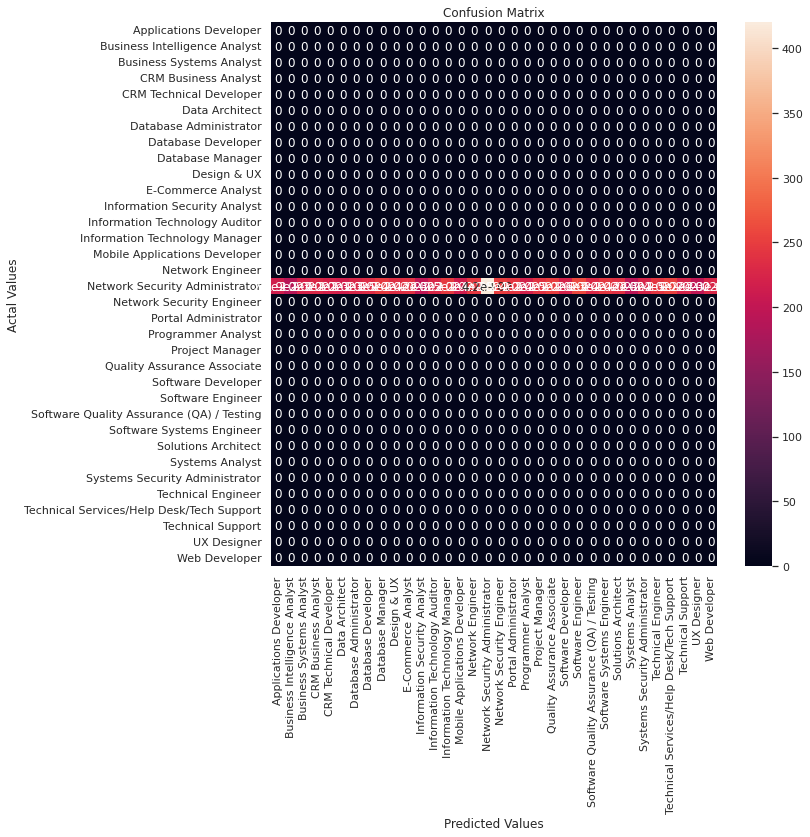


Result with testsize = 0.4 and shuffle = False
Testing Accuracy :  0.055125
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          0 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
|  8 |             8 |          0 |
|  9 |             9 |          0 |
| 10 |            10 |          0 |
| 11 |            11 |          0 |
| 12 |            12 |          0 |
| 13 |            13 |          0 |
| 14 |            14 |          0 |
| 15 |            15 |          0 |
| 16 |            16 |          1 |
| 17 |            17 |          0 |
| 18 |            18 |          0 |
| 19 |            19 |          0 |
| 20 |            20 |          0 |
| 21 |            21 |     

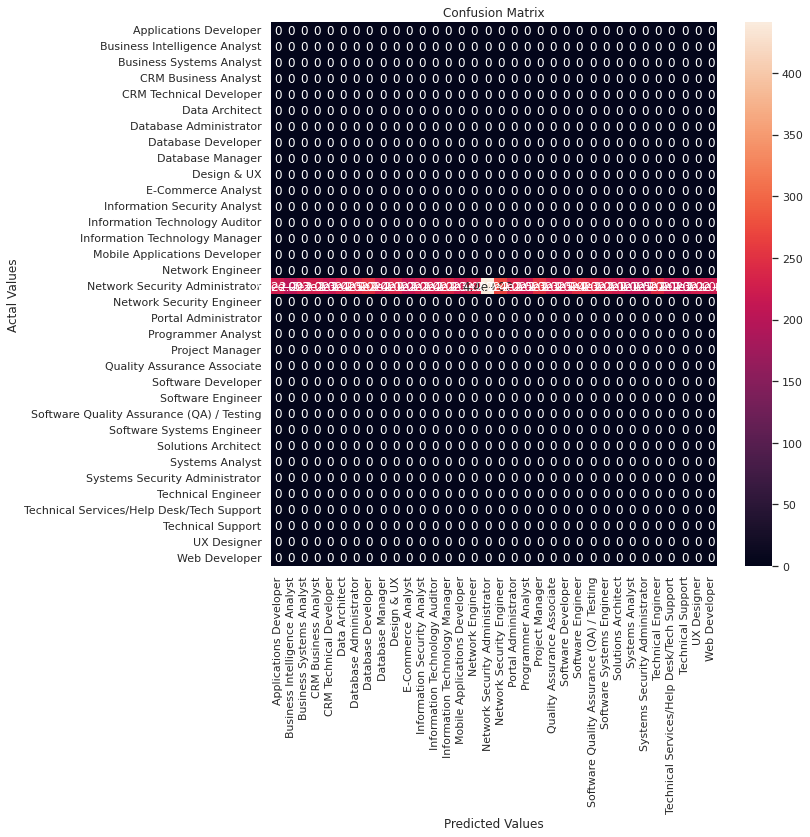


Result with testsize = 0.3 and shuffle = True
Testing Accuracy :  0.05333333333333334
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          0 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
|  8 |             8 |          0 |
|  9 |             9 |          0 |
| 10 |            10 |          0 |
| 11 |            11 |          0 |
| 12 |            12 |          0 |
| 13 |            13 |          0 |
| 14 |            14 |          0 |
| 15 |            15 |          0 |
| 16 |            16 |          1 |
| 17 |            17 |          0 |
| 18 |            18 |          0 |
| 19 |            19 |          0 |
| 20 |            20 |          0 |
| 21 |           

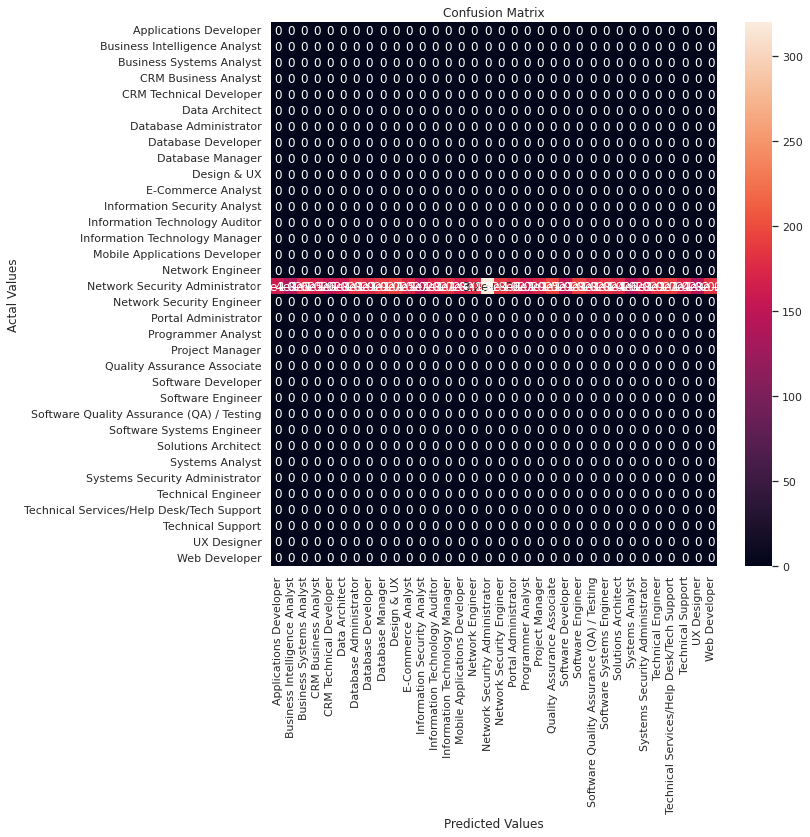


Result with testsize = 0.3 and shuffle = False
Testing Accuracy :  0.058333333333333334
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          0 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
|  8 |             8 |          0 |
|  9 |             9 |          0 |
| 10 |            10 |          0 |
| 11 |            11 |          0 |
| 12 |            12 |          0 |
| 13 |            13 |          0 |
| 14 |            14 |          0 |
| 15 |            15 |          0 |
| 16 |            16 |          1 |
| 17 |            17 |          0 |
| 18 |            18 |          0 |
| 19 |            19 |          0 |
| 20 |            20 |          0 |
| 21 |         

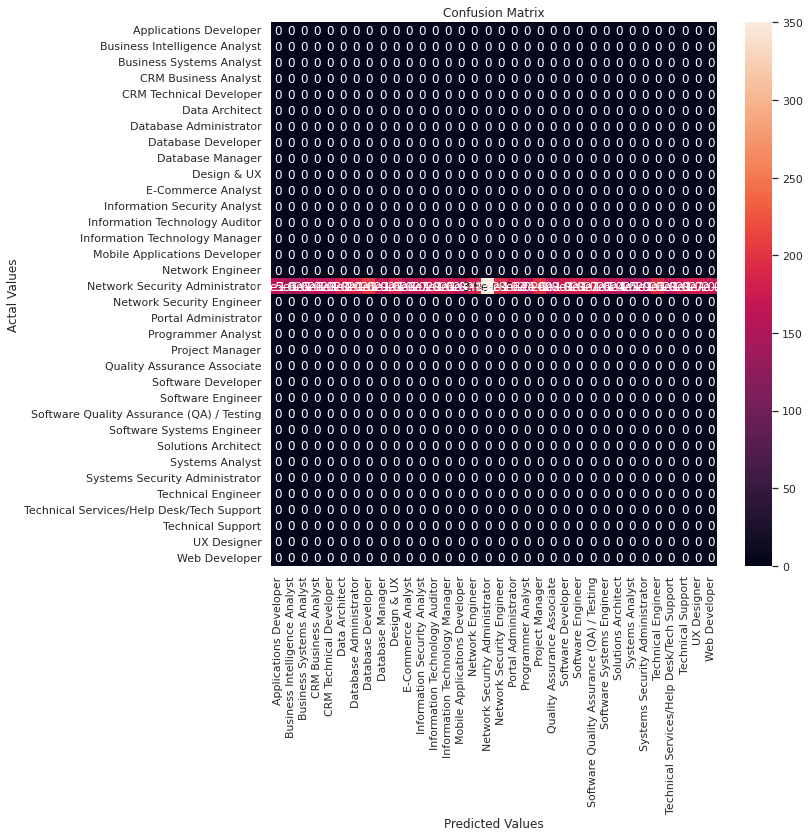


Result with testsize = 0.1 and shuffle = True
Testing Accuracy :  0.053
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          0 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
|  8 |             8 |          0 |
|  9 |             9 |          0 |
| 10 |            10 |          0 |
| 11 |            11 |          0 |
| 12 |            12 |          0 |
| 13 |            13 |          0 |
| 14 |            14 |          0 |
| 15 |            15 |          0 |
| 16 |            16 |          1 |
| 17 |            17 |          0 |
| 18 |            18 |          0 |
| 19 |            19 |          0 |
| 20 |            20 |          0 |
| 21 |            21 |         

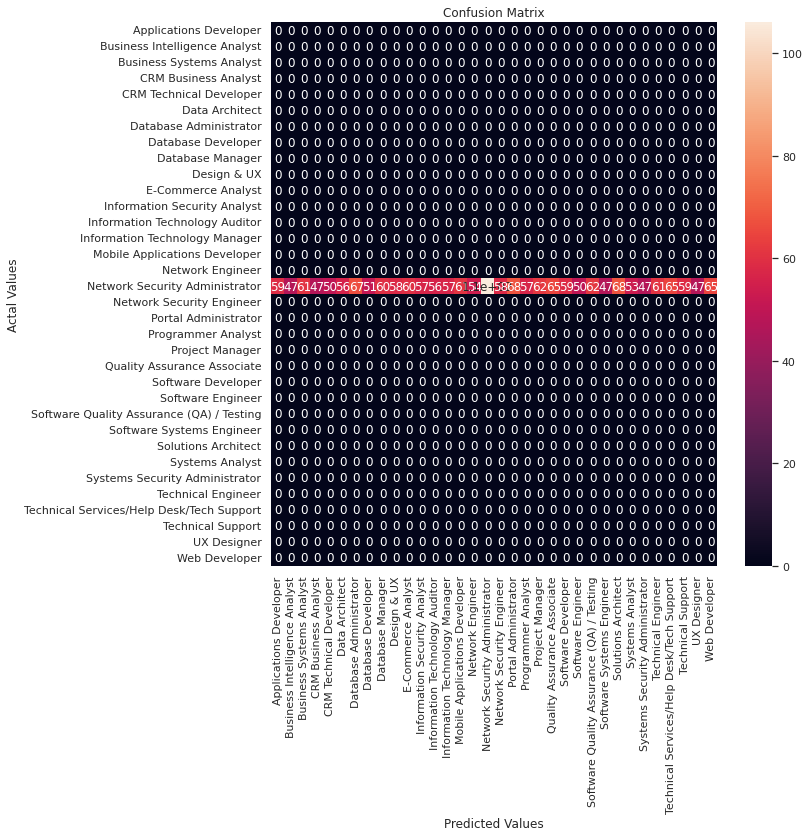


Result with testsize = 0.1 and shuffle = False
Testing Accuracy :  0.0585
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          0 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
|  8 |             8 |          0 |
|  9 |             9 |          0 |
| 10 |            10 |          0 |
| 11 |            11 |          0 |
| 12 |            12 |          0 |
| 13 |            13 |          0 |
| 14 |            14 |          0 |
| 15 |            15 |          0 |
| 16 |            16 |          1 |
| 17 |            17 |          0 |
| 18 |            18 |          0 |
| 19 |            19 |          0 |
| 20 |            20 |          0 |
| 21 |            21 |       

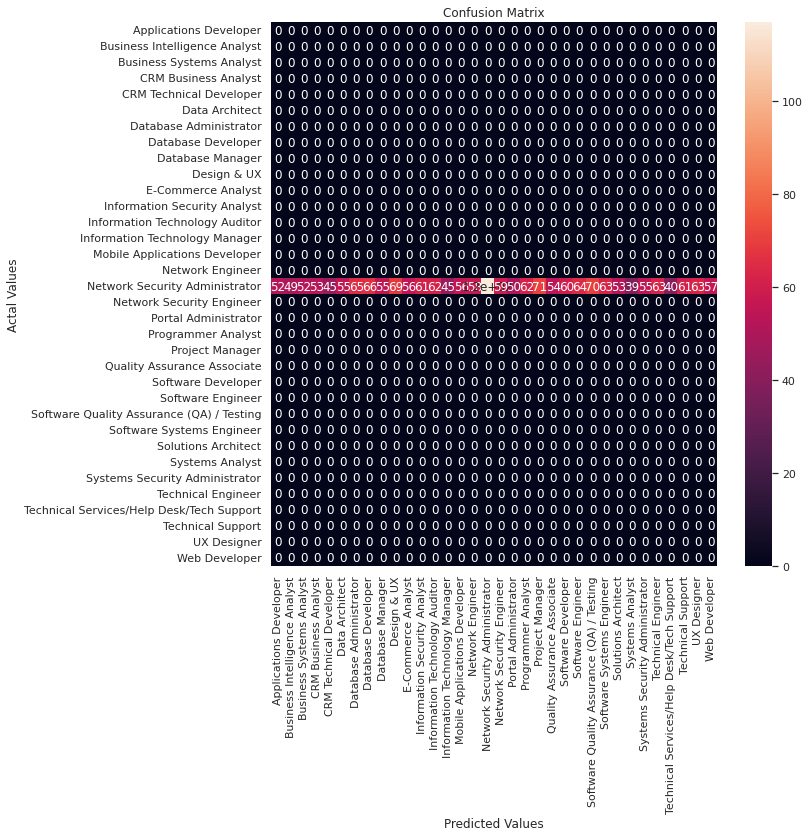

In [ ]:
splitsize = [0.4,0.3,0.1]
shuffle = [True,False]
for i in splitsize:
  for j in shuffle:
    print('Result with testsize = '+str(i)+' and shuffle = '+str(j))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i,shuffle = j,random_state=42)
    nn = GetTrainModel(hidden=(64,32),activation='logistic',opt='sgd',max_iter=1000,lr=0.01,X=X_train,y=y_train)
    GetMetrics(34,list(nn.predict(X_test)),y_test,mapping)
    print('==========================================================================')
    print()

## Technique : 2.1 [Merging classes] , number of classes = 8



In [ ]:
mapping = {'Analyst':0,'Developer':1,'Engineer':2,'Administrator':3,'Manager':4,'Architect':5,'Designer':6,
           'Support and Testing':7}

In [ ]:
Data2 = copy.copy(Data)
for i in range(len(Data2)):
  Data2['Suggested Job Role'].iloc[i] = c_map[Data['Suggested Job Role'].iloc[i]]  



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
Data2['Suggested Job Role'].value_counts()

0    3874
1    3394
2    2973
3    2860
7    2817
4    1763
6    1177
5    1142
Name: Suggested Job Role, dtype: int64

In [ ]:
y = np.array(Data2['Suggested Job Role'])
y = y.astype('int')
Data2 = Data2.drop(['Suggested Job Role'],axis=1)

In [ ]:
binning_att = ['Acedamic percentage in Operating Systems',	'percentage in Algorithms',	'Percentage in Programming Concepts',
               'Percentage in Software Engineering',	'Percentage in Computer Networks',	'Percentage in Electronics Subjects',
               'Percentage in Computer Architecture',	'Percentage in Mathematics',	'Percentage in Communication skills']
for i in binning_att:
  Data2[i] = pd.cut(Data2[i], bins=[0,70,85,100], labels=[1,2,3])

In [ ]:
Data2 = GetEncoded(Data2)
X = np.array(Data2)

Result with testsize = 0.4 and shuffle = True
Testing Accuracy :  0.142875
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |  0.181635  |
|  1 |             1 |  0.153328  |
|  2 |             2 |  0.146185  |
|  3 |             3 |  0.157565  |
|  4 |             4 |  0.0829932 |
|  5 |             5 |  0.0371991 |
|  6 |             6 |  0.0577367 |
|  7 |             7 |  0.173986  |
+----+---------------+------------+
Confusion matrix : 


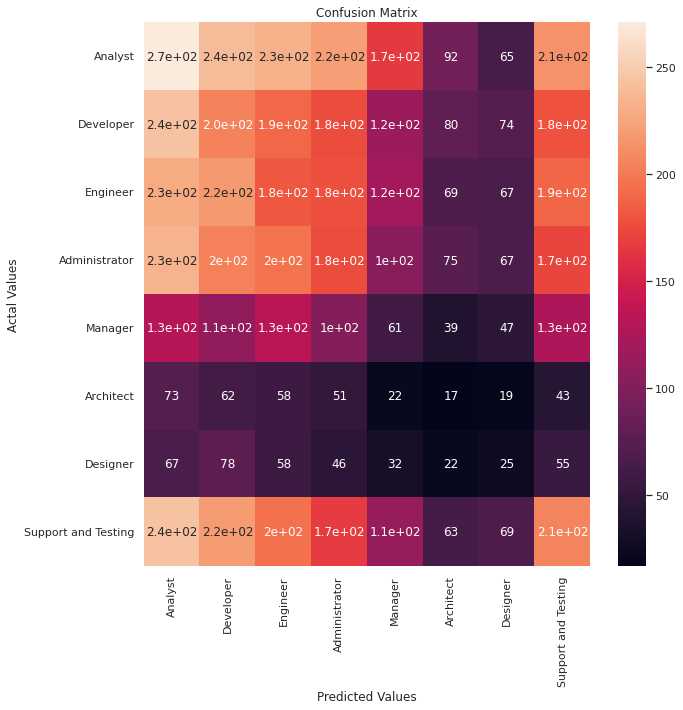

Result with testsize = 0.3 and shuffle = True
Testing Accuracy :  0.139
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |  0.217626  |
|  1 |             1 |  0.173869  |
|  2 |             2 |  0.138528  |
|  3 |             3 |  0.153664  |
|  4 |             4 |  0.0606618 |
|  5 |             5 |  0.0385757 |
|  6 |             6 |  0.038806  |
|  7 |             7 |  0.112459  |
+----+---------------+------------+
Confusion matrix : 


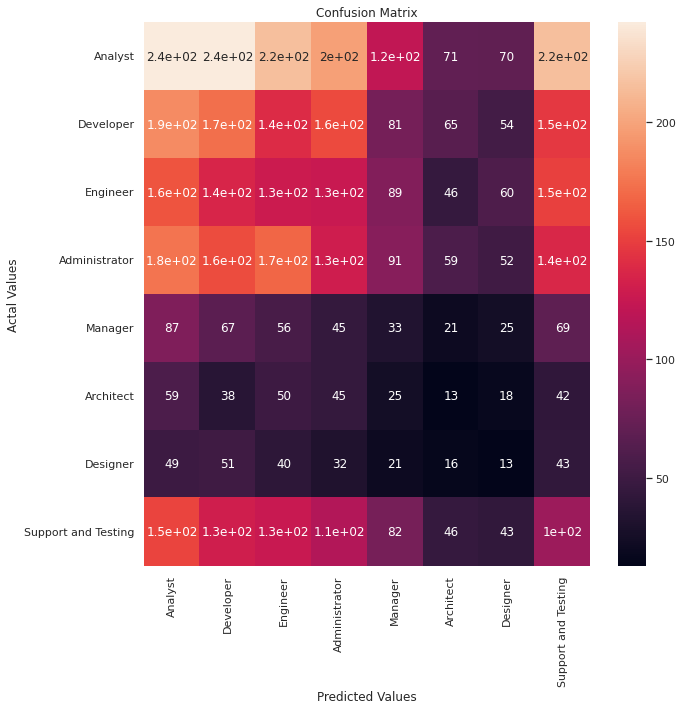

Result with testsize = 0.1 and shuffle = True
Testing Accuracy :  0.1515
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |  0.219895  |
|  1 |             1 |  0.2       |
|  2 |             2 |  0.125926  |
|  3 |             3 |  0.163194  |
|  4 |             4 |  0.0558659 |
|  5 |             5 |  0.0241935 |
|  6 |             6 |  0.0380952 |
|  7 |             7 |  0.169381  |
+----+---------------+------------+
Confusion matrix : 


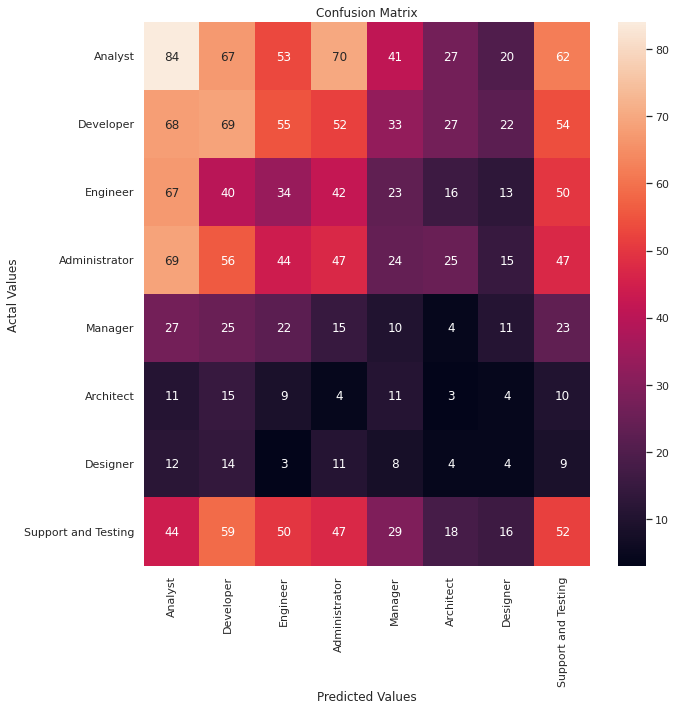

In [ ]:
splitsize = [0.4,0.3,0.1]
shuffle = [True]
for i in splitsize:
  for j in shuffle:
    print('Result with testsize = '+str(i)+' and shuffle = '+str(j))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i,shuffle = j,random_state=42)
    nn = GetTrainModel(hidden=(128,64),activation='tanh',opt='sgd',max_iter=1000,lr = 0.01,X=X_train,y=y_train)
    GetMetrics(8,list(nn.predict(X_test)),y_test,mapping)


## Technique : 2.2 [Merging classes] , number of classes = 8 , PCA

In [ ]:
Data3 = copy.copy(Data)
for i in range(len(Data3)):
  Data3['Suggested Job Role'].iloc[i] = c_map[Data3['Suggested Job Role'].iloc[i]]  

y = np.array(Data3['Suggested Job Role'])
y = y.astype('int')
Data3 = Data3.drop(['Suggested Job Role'],axis=1)

Data3 = GetEncoded(Data3)
X = np.array(Data3)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


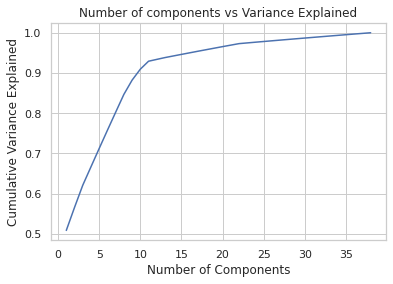

In [ ]:
X_pca = PCA()
X_pca.fit(X)

X_axis = np.arange(1,X.shape[1]+1,1)
Y_axis = np.cumsum(X_pca.explained_variance_ratio_)
plt.plot(X_axis,Y_axis)

plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Number of components vs Variance Explained')
plt.show()

In [ ]:
X_pca = PCA(n_components=15).fit_transform(X)

Result with testsize = 0.4 and shuffle = True
Testing Accuracy :  0.182375
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |   0.821046 |
|  1 |             1 |   0.175019 |
|  2 |             2 |   0        |
|  3 |             3 |   0        |
|  4 |             4 |   0        |
|  5 |             5 |   0        |
|  6 |             6 |   0        |
|  7 |             7 |   0        |
+----+---------------+------------+
Confusion matrix : 


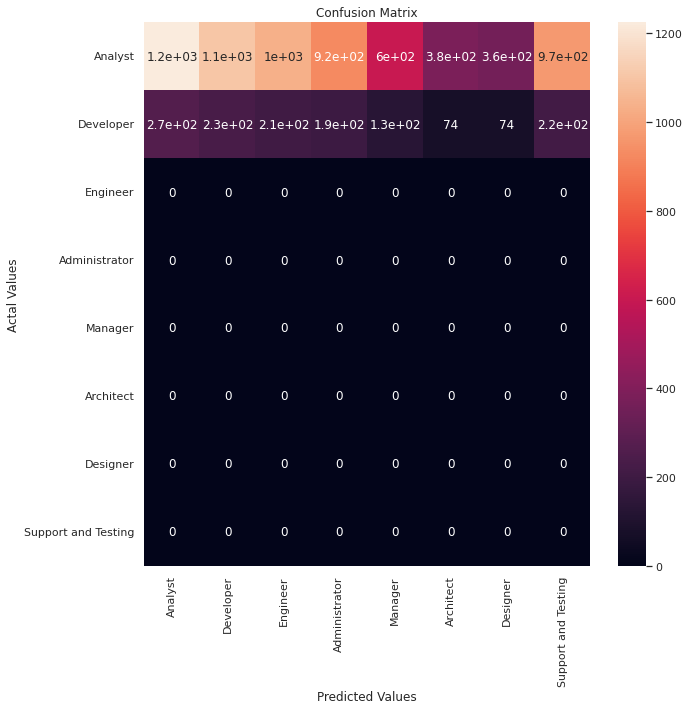

Result with testsize = 0.3 and shuffle = True
Testing Accuracy :  0.18533333333333332
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          1 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
+----+---------------+------------+
Confusion matrix : 


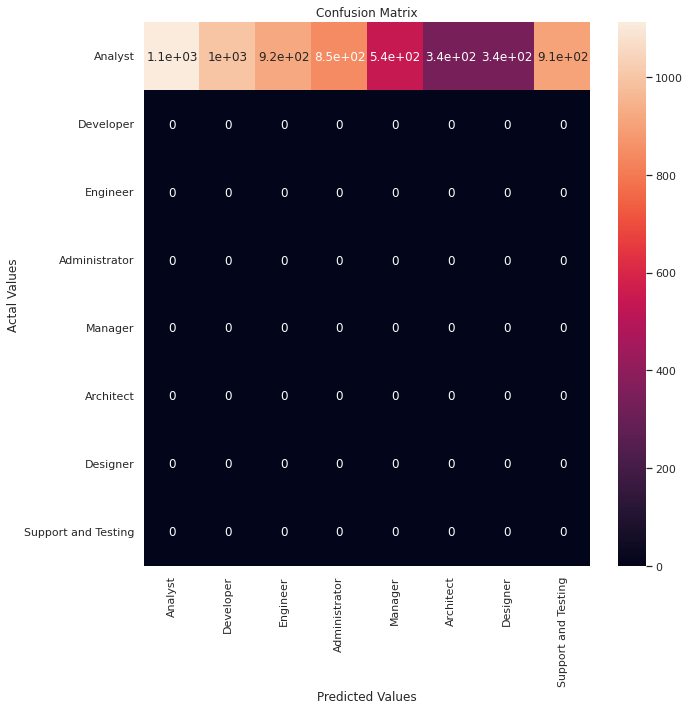

Result with testsize = 0.1 and shuffle = True
Testing Accuracy :  0.191
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          1 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
+----+---------------+------------+
Confusion matrix : 


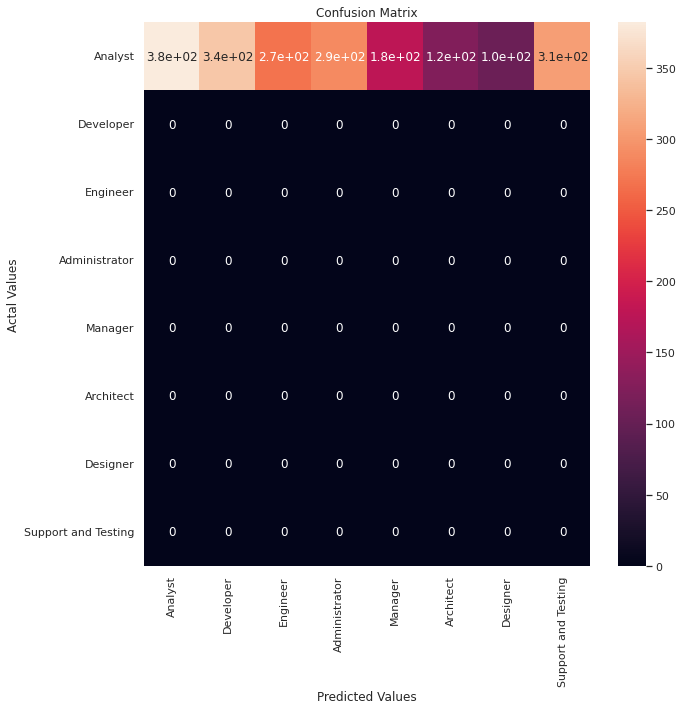

In [ ]:
splitsize = [0.4,0.3,0.1]
shuffle = [True]
for i in splitsize:
  for j in shuffle:
    print('Result with testsize = '+str(i)+' and shuffle = '+str(j))
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=i,shuffle = j,random_state=42)
    nn = GetTrainModel(hidden=(32,64),activation='logistic',opt='sgd',max_iter=1000,lr = 0.01,X=X_train,y=y_train)
    GetMetrics(8,list(nn.predict(X_test)),y_test,mapping)

## Technique : 2.3 [Merging classes] , number of classes = 8 , TSNE

In [ ]:
Data4 = copy.copy(Data)
for i in range(len(Data4)):
  Data4['Suggested Job Role'].iloc[i] = c_map[Data4['Suggested Job Role'].iloc[i]]  

y = np.array(Data4['Suggested Job Role'])
y = y.astype('int')
Data4 = Data4.drop(['Suggested Job Role'],axis=1)

Data4 = GetEncoded(Data4)
X = np.array(Data4)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
# Tsne_model = TSNE(n_components = 3, random_state=42,perplexity =50, n_iter=1000,init='pca')
# X_tsne = Tsne_model.fit_transform(X)

In [ ]:
X_tsne = np.load('/content/drive/MyDrive/Projects/AI_Assignments/Assignment_4/tsne_data.npy')

Result with testsize = 0.4 and shuffle = True
Testing Accuracy :  0.193625
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          1 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
+----+---------------+------------+
Confusion matrix : 


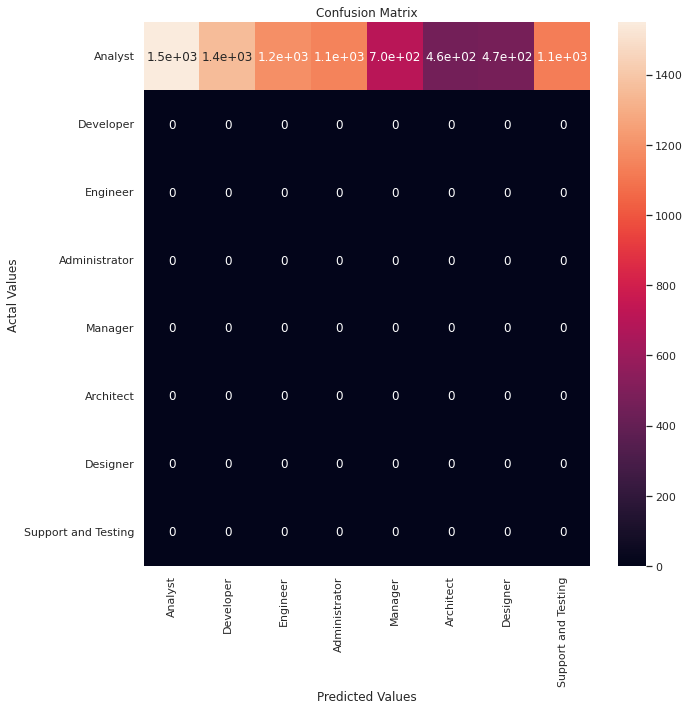

Result with testsize = 0.3 and shuffle = True
Testing Accuracy :  0.19366666666666665
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          1 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
+----+---------------+------------+
Confusion matrix : 


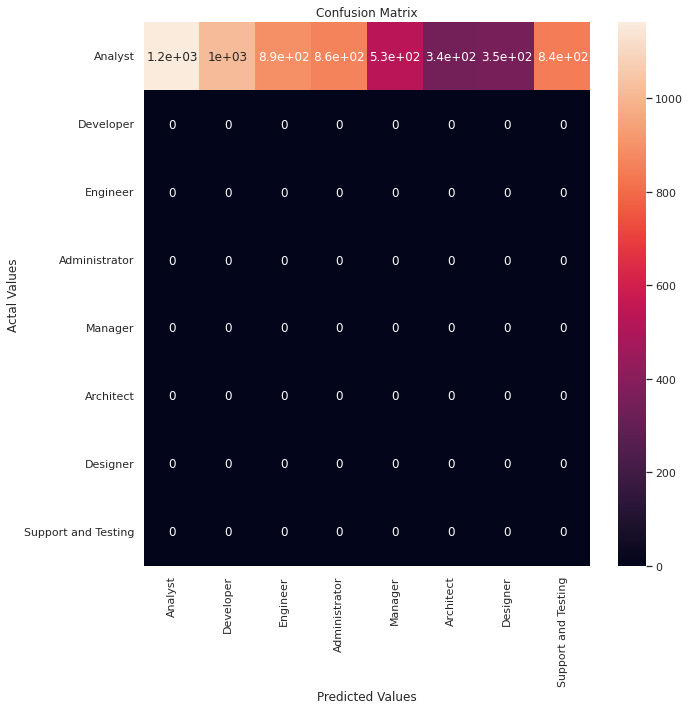

Result with testsize = 0.1 and shuffle = True
Testing Accuracy :  0.1935
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          1 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
+----+---------------+------------+
Confusion matrix : 


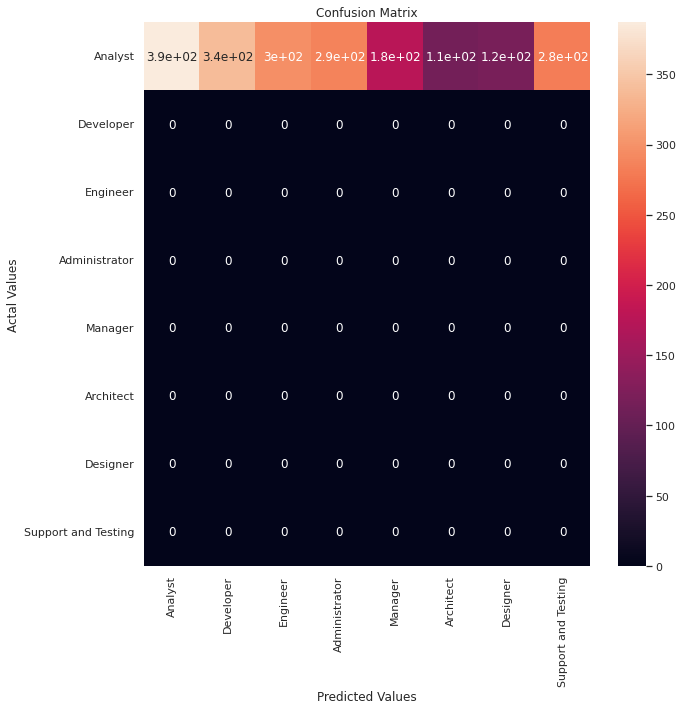

In [ ]:
splitsize = [0.4,0.3,0.1]
shuffle = [True]
for i in splitsize:
  for j in shuffle:
    print('Result with testsize = '+str(i)+' and shuffle = '+str(j))
    X_train, X_test, y_train, y_test = train_test_split(X_tsne, y, test_size=i,shuffle = j,stratify=y,random_state=42)
    nn = GetTrainModel(hidden=(32,64),activation='logistic',opt='sgd',max_iter=1000,lr = 0.01,X=X_train,y=y_train)
    GetMetrics(8,list(nn.predict(X_test)),y_test,mapping)

## Technique : 2.4 [Merging classes] , One hot encoding

In [ ]:
Data5 = copy.copy(Data)
for i in range(len(Data5)):
  Data5['Suggested Job Role'].iloc[i] = c_map[Data5['Suggested Job Role'].iloc[i]]  

y = np.array(Data5['Suggested Job Role'])
y = y.astype('int')
Data5 = Data5.drop(['Suggested Job Role'],axis=1)

Data5 = GetEncoded(Data5)
X = np.array(Data5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
Data5 = pd.get_dummies(Data5)
X = np.array(Data5)

Result with testsize = 0.4 and shuffle = True
Testing Accuracy :  0.1935
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |   0.94448  |
|  1 |             1 |   0.062592 |
|  2 |             2 |   0        |
|  3 |             3 |   0        |
|  4 |             4 |   0        |
|  5 |             5 |   0        |
|  6 |             6 |   0        |
|  7 |             7 |   0        |
+----+---------------+------------+
Confusion matrix : 


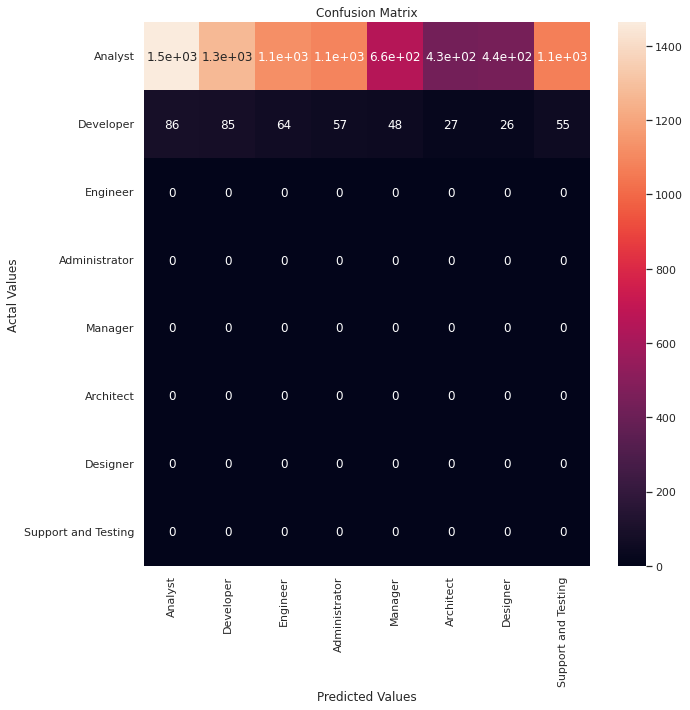

Result with testsize = 0.3 and shuffle = True
Testing Accuracy :  0.19366666666666665
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          1 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
+----+---------------+------------+
Confusion matrix : 


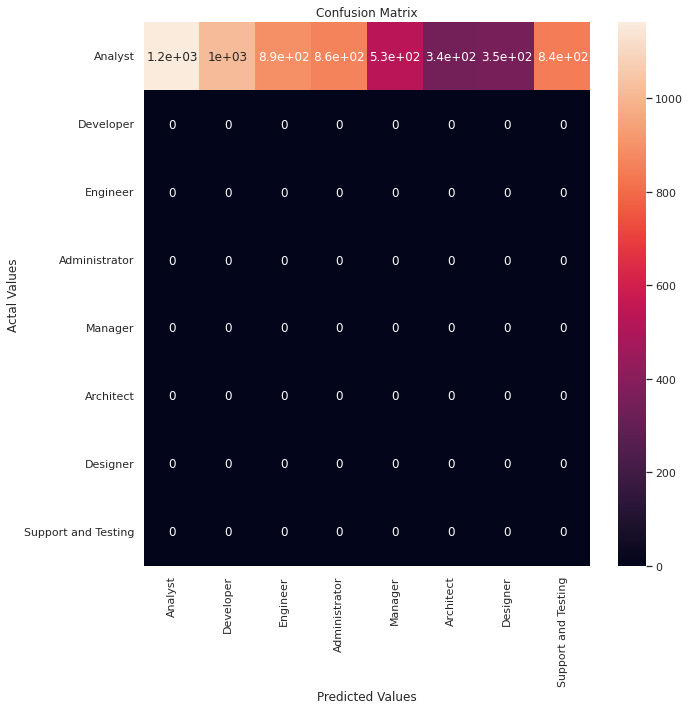

Result with testsize = 0.1 and shuffle = True
Testing Accuracy :  0.1935
Class wise Testing Accuracy : 

+----+---------------+------------+
|    |   Class Label |   Accuracy |
|----+---------------+------------|
|  0 |             0 |          1 |
|  1 |             1 |          0 |
|  2 |             2 |          0 |
|  3 |             3 |          0 |
|  4 |             4 |          0 |
|  5 |             5 |          0 |
|  6 |             6 |          0 |
|  7 |             7 |          0 |
+----+---------------+------------+
Confusion matrix : 


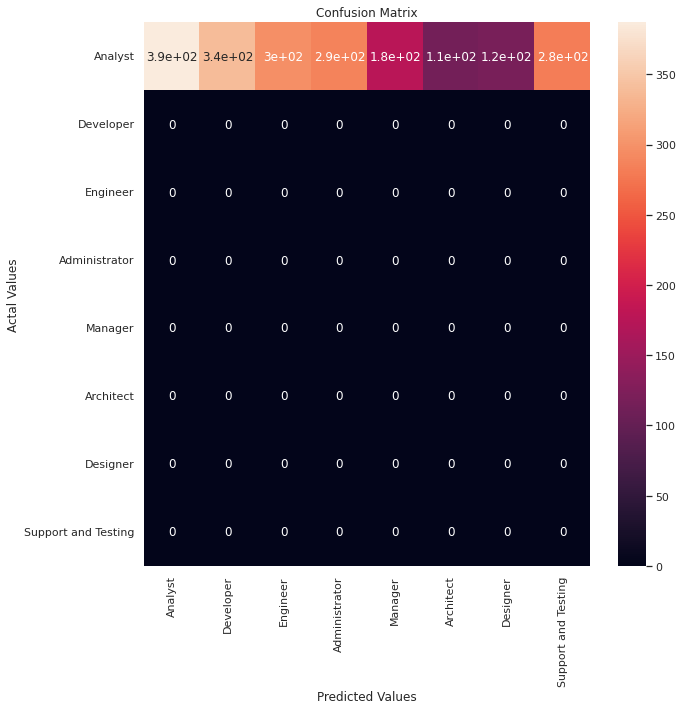

In [ ]:
splitsize = [0.4,0.3,0.1]
shuffle = [True]
for i in splitsize:
  for j in shuffle:
    print('Result with testsize = '+str(i)+' and shuffle = '+str(j))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i,shuffle = j,stratify=y,random_state=42)
    nn = GetTrainModel(hidden=(32,64),activation='logistic',opt='sgd',max_iter=1000,lr = 0.01,X=X_train,y=y_train)
    GetMetrics(8,list(nn.predict(X_test)),y_test,mapping)